In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.501474,0.793987,-2.342722e-07,0.500577,0.686018,0.003301,0.490489,0.578708,-0.008160,0.454789,...,0.400535,0.604233,-0.093077,0.402443,0.633628,-0.084098,0.426009,0.647065,-0.075116,1
1,0.493828,0.780830,-2.012120e-07,0.484536,0.676859,0.001440,0.472548,0.571474,-0.011993,0.440376,...,0.400819,0.590703,-0.095425,0.402021,0.621321,-0.087490,0.426068,0.634592,-0.079456,1
2,0.443688,0.736656,-3.143462e-07,0.404281,0.656083,-0.025395,0.391582,0.569696,-0.050732,0.404871,...,0.484270,0.623719,-0.094574,0.464181,0.656108,-0.083041,0.479225,0.670384,-0.070653,1
3,0.444282,0.745212,-2.325066e-07,0.408454,0.689177,-0.037095,0.405921,0.601095,-0.059173,0.451850,...,0.554176,0.626379,-0.096038,0.512206,0.663381,-0.085151,0.499721,0.664907,-0.070620,1
4,0.440260,0.750597,-9.925638e-08,0.411808,0.698576,-0.040379,0.417646,0.621411,-0.062169,0.462968,...,0.560498,0.620749,-0.095946,0.524168,0.658891,-0.086106,0.501650,0.663743,-0.071332,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.466439,0.600109,-6.431730e-07,0.433134,0.535821,-0.001893,0.437207,0.468363,-0.006856,0.442585,...,0.481383,0.417169,-0.055662,0.459157,0.457157,-0.048671,0.469727,0.490660,-0.036899,SS
1595,0.516213,0.569853,-3.306578e-07,0.543778,0.514165,0.004633,0.546477,0.448964,-0.002102,0.518031,...,0.447960,0.399130,-0.050458,0.438136,0.427921,-0.047245,0.440438,0.457335,-0.043121,SS
1596,0.494905,0.587937,-4.929701e-07,0.497613,0.525727,0.003555,0.500040,0.460589,-0.003852,0.486948,...,0.440164,0.392784,-0.061296,0.427671,0.430836,-0.058608,0.440394,0.462193,-0.052755,SS
1597,0.432458,0.665133,-9.639956e-07,0.396850,0.576344,0.004549,0.400825,0.480710,0.003891,0.415201,...,0.489547,0.415258,-0.050233,0.468068,0.461443,-0.039413,0.480513,0.496439,-0.024815,SS


In [4]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.501474,0.793987,-2.342722e-07,0.500577,0.686018,0.003301,0.490489,0.578708,-0.008160,0.454789,...,0.400535,0.604233,-0.093077,0.402443,0.633628,-0.084098,0.426009,0.647065,-0.075116,1
1,0.493828,0.780830,-2.012120e-07,0.484536,0.676859,0.001440,0.472548,0.571474,-0.011993,0.440376,...,0.400819,0.590703,-0.095425,0.402021,0.621321,-0.087490,0.426068,0.634592,-0.079456,1
2,0.443688,0.736656,-3.143462e-07,0.404281,0.656083,-0.025395,0.391582,0.569696,-0.050732,0.404871,...,0.484270,0.623719,-0.094574,0.464181,0.656108,-0.083041,0.479225,0.670384,-0.070653,1
3,0.444282,0.745212,-2.325066e-07,0.408454,0.689177,-0.037095,0.405921,0.601095,-0.059173,0.451850,...,0.554176,0.626379,-0.096038,0.512206,0.663381,-0.085151,0.499721,0.664907,-0.070620,1
4,0.440260,0.750597,-9.925638e-08,0.411808,0.698576,-0.040379,0.417646,0.621411,-0.062169,0.462968,...,0.560498,0.620749,-0.095946,0.524168,0.658891,-0.086106,0.501650,0.663743,-0.071332,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.466439,0.600109,-6.431730e-07,0.433134,0.535821,-0.001893,0.437207,0.468363,-0.006856,0.442585,...,0.481383,0.417169,-0.055662,0.459157,0.457157,-0.048671,0.469727,0.490660,-0.036899,SS
1595,0.516213,0.569853,-3.306578e-07,0.543778,0.514165,0.004633,0.546477,0.448964,-0.002102,0.518031,...,0.447960,0.399130,-0.050458,0.438136,0.427921,-0.047245,0.440438,0.457335,-0.043121,SS
1596,0.494905,0.587937,-4.929701e-07,0.497613,0.525727,0.003555,0.500040,0.460589,-0.003852,0.486948,...,0.440164,0.392784,-0.061296,0.427671,0.430836,-0.058608,0.440394,0.462193,-0.052755,SS
1597,0.432458,0.665133,-9.639956e-07,0.396850,0.576344,0.004549,0.400825,0.480710,0.003891,0.415201,...,0.489547,0.415258,-0.050233,0.468068,0.461443,-0.039413,0.480513,0.496439,-0.024815,SS


In [5]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1599, 63)
Labels shape = (1599,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [7]:
y_pred = svm.predict(x_test)
y_pred

array(['5', '5', '5', '3', '5', '5', '3', '5', '5', '3', '5', '3', '5',
       '3', 'SS', 'SS', '5', '5', 'SS', '1', '5', '3', 'OK', '5', '5',
       'PTRN8', '4', 'PTRN8', '1', '3', '3', '2', '5', '5', '3', '3', '5',
       '5', '5', '5', '3', '5', '5', '2', 'PTRN8', 'OK', '5', '5', '5',
       'OK', '1', '1', '5', '3', '5', '5', '5', '3', '5', '5', '2', '3',
       '5', '3', '1', 'SS', 'SS', '3', '3', '3', '2', '1', '5', '1', 'SS',
       'OK', '4', '5', '1', 'SS', '3', 'SS', 'SS', '5', 'PTRN8', '3', '3',
       '4', '1', '5', '3', '5', '5', 'OK', '5', '2', '5', '3', '5', '3',
       '5', 'SS', '5', 'SS', '5', '2', '5', 'PTRN8', 'SS', '5', '5', '3',
       'PTRN8', '5', '5', '2', '5', '5', '4', 'OK', '5', '3', '5', '1',
       'SS', 'OK', '3', '4', '5', '5', '5', '5', '5', '5', '5', '3', '2',
       '5', '3', 'OK', '5', '2', '5', '5', '5', '2', 'PTRN8', '5', '5',
       '5', '2', 'PTRN8', 'PTRN8', '4', '5', '1', '3', '5', '5', '5',
       'SS', '5', '3', '4', '3', '4', 'PTRN8', '5', 

In [8]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.878125, 0.878125, 0.878125)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

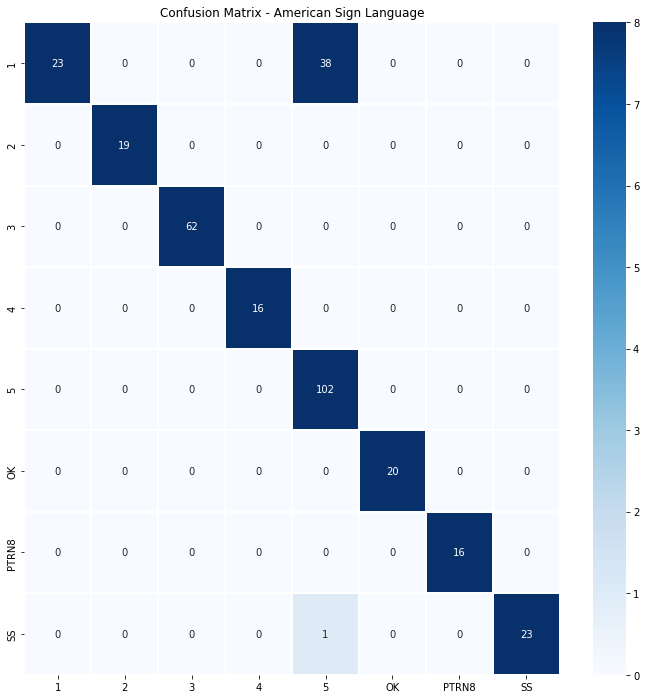

In [9]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)